In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# check data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df.shape

(14999, 10)

# 

## How does the average satisfaction level change with increasing years of employemen?

* we can be answered via 
  * Line Plot:
  * Scatter Plot:


In [6]:
# Calculate average satisfaction level for each years of employement
avg_satisfaction_year=df.groupby(['time_spend_company']).satisfaction_level.mean()
avg_satisfaction_year

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

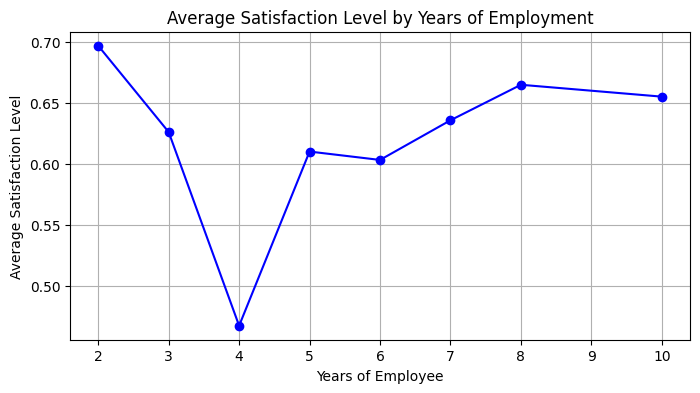

In [7]:
plt.figure(figsize=(8,4))
x_data = avg_satisfaction_year.index
y_data = avg_satisfaction_year.values
plt.plot(x_data,y_data, marker='o',color='b')
plt.xlabel('Years of Employee')
plt.ylabel('Average Satisfaction Level')
plt.title("Average Satisfaction Level by Years of Employment")
plt.grid(True) # it display the graph
plt.show()

* Decrease Trend: At start satisfaction_level is high and it decreases upto 4 years 
* Increase Trend: After 4 years the satisfaction_level starts increasing.


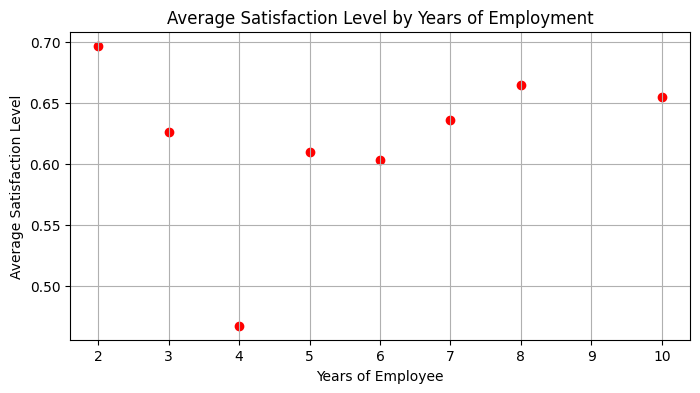

In [8]:
plt.figure(figsize=(8,4))
plt.scatter(x_data,y_data, marker='o',color='red')
plt.xlabel('Years of Employee')
plt.ylabel('Average Satisfaction Level')
plt.title("Average Satisfaction Level by Years of Employment")
plt.grid(True) # it display the graph
plt.show()

* This shows scatter plot is quits similar to line plot except dots are not connected by line.

# How many employee have spent a specific number of years (time spent in the company)?

* we can be answer via: 

  * Bar Plot

In [9]:
emp_years_count = df['time_spend_company'].value_counts()
emp_years_count

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

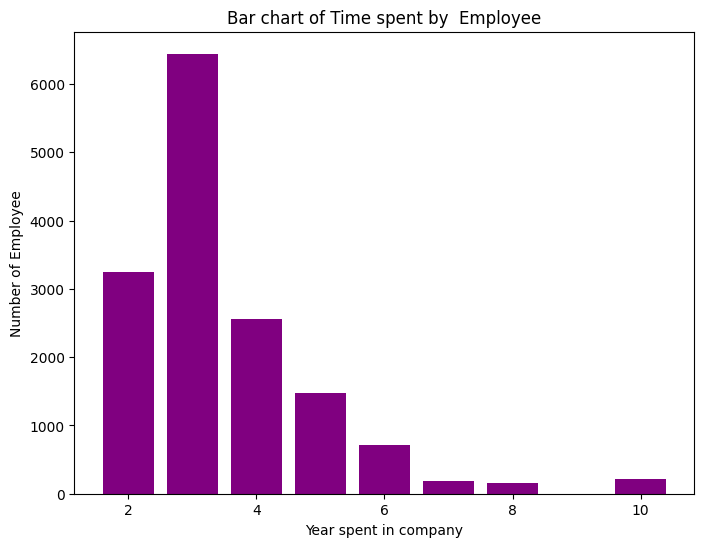

In [10]:
plt.figure(figsize=(8,6))
plt.bar(emp_years_count.index,emp_years_count.values,color='purple')
plt.xlabel('Year spent in company')
plt.ylabel('Number of Employee')
plt.title('Bar chart of Time spent by  Employee')
plt.show()

* Most employee spent 3 years in company
* After 3 years time spend in company is decreasing upto 9 years.
* But there are some number of people who are staying even for 10 years.

# What is the distribution of satisfaction levels among employees?

* We can be answer via: 
   
   *  histogram Plot
   
   

Text(0.5, 1.0, 'Distribution of Satisfaction Levels')

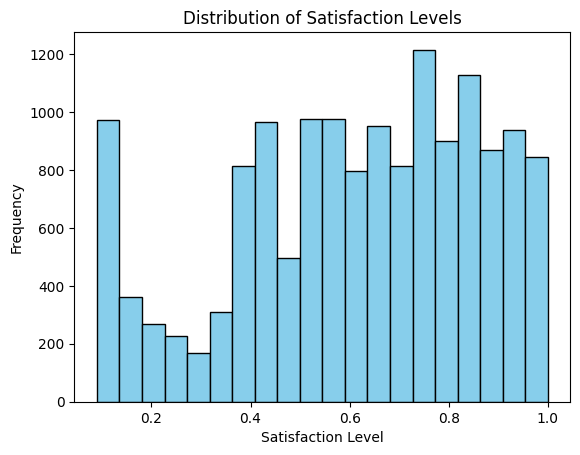

In [11]:
plt.hist(df['satisfaction_level'],bins=20,color='skyblue',edgecolor='black')# edgecolor set the edge of the bar
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Levels')


* This shows that distribution of satisfaction_level column is not Normal Distribution.
* We can say. Satisfaction_level is slightly left skewed.

# What is the distibution of work accidents among sales?

* We can be answered via:
  
   * Pie_chart

In [12]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
accident_counts = df.groupby('sales')['Work_accident'].sum()
accident_counts

sales
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64

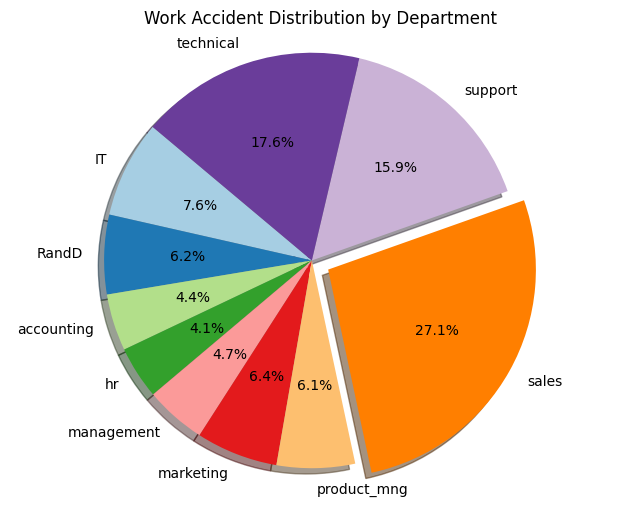

In [14]:
plt.figure(figsize=(8,6))
pie_labels=accident_counts.index
pie_data = accident_counts.values
# define how much to explode different pie wedges
explode = [0,0,0,0,0,0,0,0.09,0,0] # tukyaune
plt.pie(x=pie_data,labels=pie_labels,autopct='%1.1f%%',startangle=140,explode=explode,shadow=True,colors=plt.cm.Paired.colors)
plt.title('Work Accident Distribution by Department')
plt.axis('equal')
plt.show()
       

* This shows that Sales department has highest number of work accident 2.1%

# what is the distribution of promotions based on department?

In [15]:
# count and unstack to get pivot table
promotion_by_department = df.groupby(['sales','promotion_last_5years']).promotion_last_5years.count().unstack()
promotion_by_department

promotion_last_5years,0,1
sales,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


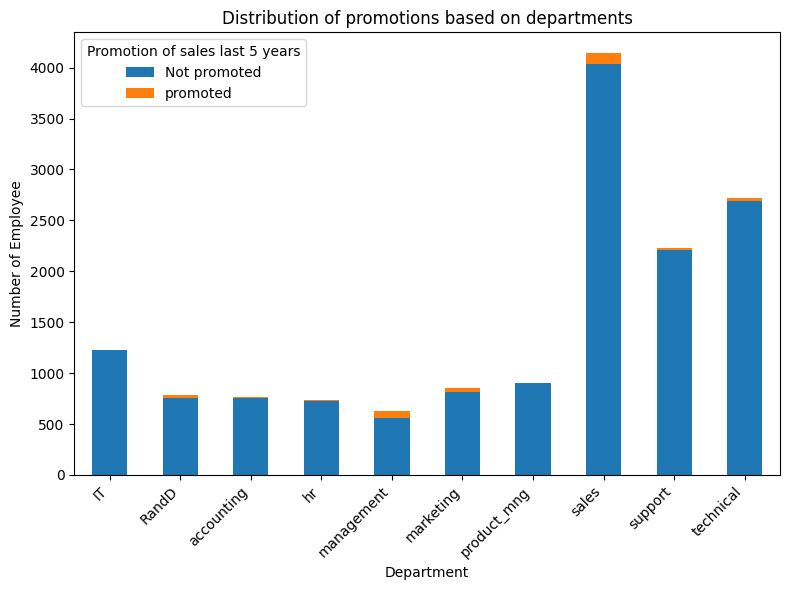

In [16]:
ax = promotion_by_department.plot(kind='bar',stacked=True,figsize=(8,6))
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.xticks(rotation = 45,ha='right')
plt.title('Distribution of promotions based on departments')
plt.legend(title='Promotion of sales last 5 years', labels=['Not promoted','promoted'])
plt.tight_layout()
plt.show()

* This shows the total number of employees are in sales department.
* Largest promoted employee count are from sales department followed by management department.
* IT and Product_management department employees doesnot got promotions.

# How does employee satisfaction very across different deparments?

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
depart_wise_satisfaction = df.groupby(['sales']).satisfaction_level.sum()
depart_wise_satisfaction

sales
IT              758.46
RandD           487.80
accounting      446.51
hr              442.52
management      391.45
marketing       530.76
product_mng     558.91
sales          2543.81
support        1378.19
technical      1653.48
Name: satisfaction_level, dtype: float64

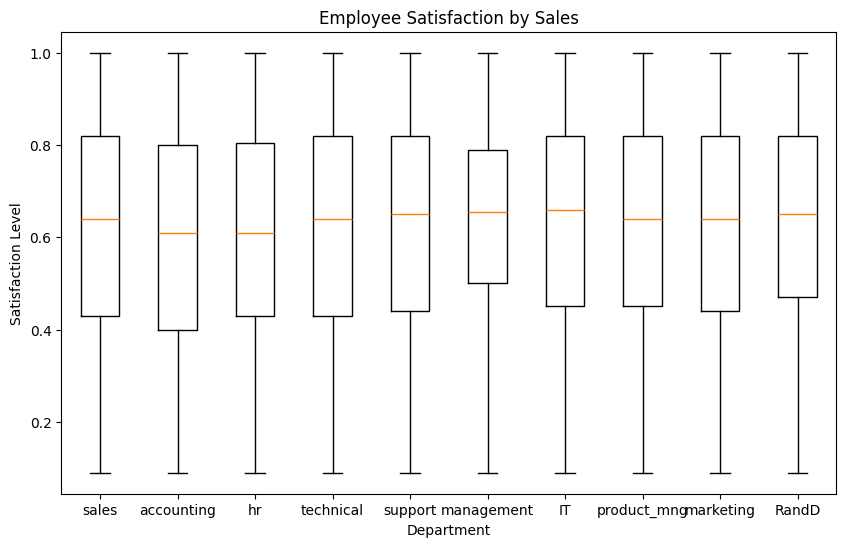

In [30]:
plt.figure(figsize=(10,6))
plt.boxplot(depart_wise_satisfaction,labels=df['sales'].unique())
plt.ylabel('Satisfaction Level')
plt.xlabel('Department')
plt.title('Employee Satisfaction by Sales')
plt.show()
plt.show()

In [ ]:
depart_wise_satisfaction = [df[df['sales']== depart]['satisfaction_level']
                            for depart in df['sales'].unique()
                            ]
depart_wise_satisfaction

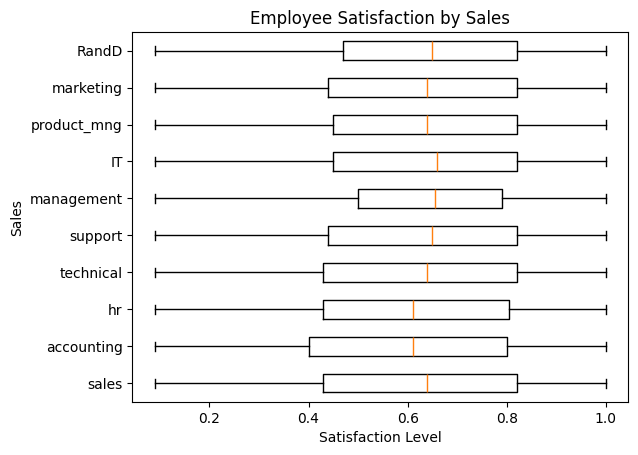

In [24]:
plt.boxplot(depart_wise_satisfaction, labels=df['sales'].unique(),vert=False)
plt.xlabel('Satisfaction Level')
plt.ylabel('Sales')
plt.title('Employee Satisfaction by Sales')
plt.show()

* min and max satisfaction level among department are quits similar in range.
* Also, there are no any outliers, since no any data points are above lower fence and upper fence of Box plots.

# Q.7 Figure out employee leaving status (time_spend vs satisfaction_level with left as HUE)?
* We can be answerd via: Bubble Plot
  * A bubble plots is a variation of the scatter plot that display three dimensions of data (x,y,z).
  * The data points are replace with bubbles.
  * The size of the Bubbles is determined by the third variable z also know as the weight.


In [51]:
df.groupby(['time_spend_company']).left.sum(),df.groupby('time_spend_company').satisfaction_level.mean()

(time_spend_company
 2       53
 3     1586
 4      890
 5      833
 6      209
 7        0
 8        0
 10       0
 Name: left, dtype: int64,
 time_spend_company
 2     0.697078
 3     0.626314
 4     0.467517
 5     0.610305
 6     0.603440
 7     0.635957
 8     0.665062
 10    0.655327
 Name: satisfaction_level, dtype: float64)

In [58]:
stats_by_time_spend = df.groupby('time_spend_company').agg({'satisfaction_level':'mean','left':'sum'})
stats_by_time_spend

,satisfaction_level,left
time_spend_company,,
2,0.697078,53
3,0.626314,1586
4,0.467517,890
5,0.610305,833
6,0.603440,209
7,0.635957,0
8,0.665062,0
10,0.655327,0


In [ ]:
x_data = stats_by_time_spend['time_spend_company']
y_data = stats_by_time_spend['satisfaction_level']
z_data = stats_by_time_spend['left']

# normalize weights i.e z_data to be in the range of 0 to 1
z_weights = (z_data - z_data.min()) / (z_data.max() - z_data.min())

plt.figure(figsize=(10,6))
ax = plt.scatter(x_data,y_data,alpha=0.8)
plt.xlabel('Time spend Years')
color_bar = plt.colorbar(ax)
color_bar.set_label('Left')
plt.grid(linestyle='--')
plt.show()


# Q.8 How are the numerical variables correlated with each other?
* We can be answerd via: 
  * Heatmap is a two-dimensional graphical representation of data where the indivisual values that are contained in a matrix are represented as colours.

<Axes: >

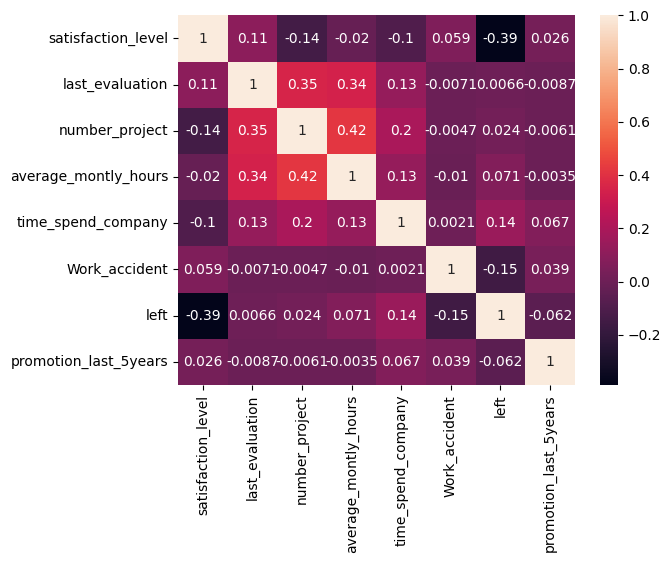

In [70]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix
sns.heatmap(correlation_matrix,annot=True)

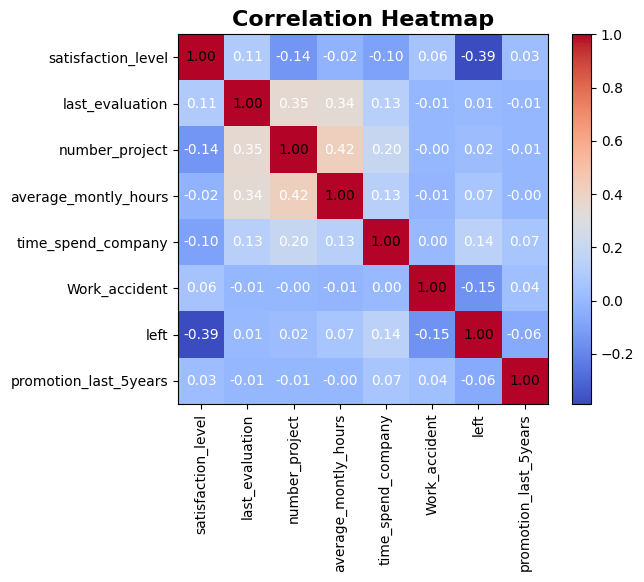

In [88]:
heatmap= plt.imshow(correlation_matrix,cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize = 16, fontweight='bold')

# add anotation
# using nested Loops and text() funtion from matplotlib
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j,i,f'{correlation_matrix.iloc[i,j]:.2f}',ha='center',va='center',
                 color = 'white' if correlation_matrix.iloc[i,j] < 0.5 else 'black' )
# define colorbar to interpret color range
plt.colorbar(heatmap)
#  to redefine xticks label and yticks label with column names
plt.xticks(range(len(correlation_matrix.columns)),correlation_matrix.columns,rotation=90)
plt.yticks(range(len(correlation_matrix.columns)),correlation_matrix.columns)
plt.show()

* Corrlation in diagonal is 1 (high) since correlation of variables with the same variables is always high.
* Corrrlation between satisfaction_level column is -0.39 (negatively correlated)
   * This means, increase in satisfaction_level decreases the chance of employee leaving company.

# Q.9 How to create different scatter plots under single matplotlib figure?
* We can be answered via:
  * Subplots:
    * subplots method provids a way to plot multiple plots on a single figure.
    * Subplots are particularly useful when you want to show different views or relationships between variables in a compact and organized manner.